In [2]:
# De ley
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np
from numpy.random import seed
from numpy.random import randn
from IPython.display import Image

#librerias para relizar aprendizaje automatico 
##para separar el conjunto de datos en entrenamiento y test 
from sklearn.model_selection import train_test_split 

#construir el modelo con el algoritmo de regresion lineal
from sklearn.linear_model import LinearRegression

#para determinar el rendimiento del modelo con las metricas MSE, MAE y R2
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

#para sacar un reporte estadistico que podemos usar para determinar la importancia de las variables explicativas 
import statsmodels.api as sm


Comenzaremos por estudiar dos variables conjuntamente:

* YearsExperiece: Años de experiencia en un trabajo.
* Salary: El salario ganado por los años de experiencia.

La idea es ver si podemos predecir de la mejor manera el salario obtenido de acuerdo a los años de experiencia ganados.

* $Y_i$ : Salary
* $X_i$ : YearsExperience 



In [2]:
df = pd.DataFrame({
    'headcirc': [27,29,30,28,29,23,22,26,27,25,23,26,27,27],
    'gestage' : [29,31,33,31,30,25,27,29,28,29,26,30,29,29]
})

In [6]:
ruta1 = 'C:/Users/XMX5634/Documents/theory-of-ML-algorithms/Datasets/Salary_Data.csv'
#ruta2 = 'C:/Users/XMX5634/Documents/theory-of-ML-algorithms/Datasets/Salary_Data.csv''
df = pd.read_csv(ruta1)

In [7]:
df.head()

YearsExperience   Salary
0              1.1  39343.0
1              1.3  46205.0
2              1.5  37731.0
3              2.0  43525.0
4              2.2  39891.0

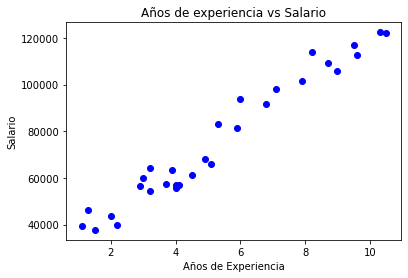

In [8]:
plt.scatter(df['YearsExperience'], df['Salary'], color = 'blue')
plt.xlabel('Años de Experiencia')
plt.ylabel('Salario')
plt.title('Años de experiencia vs Salario')
plt.show()

Esto nos sugiere que el perimetro cefalico aumenta al aumentar la edad gestacional, dicho aumento pareciera seguir un patron lineal. 

Lo ideal es verificar los supuestos de normalidad conjunta.

# Modelo de regresion Lineal Simple

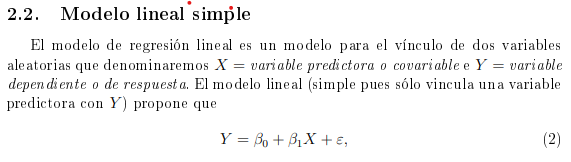

In [6]:
Image(filename = 'C:/Users/URIEL/Documents/ALGORITMOS DE MACHINE LEARNING/imagenes/regresion_1.png')

Se propone el modelo de regresión lineal simple que 'modele' a los datos propuestos, tal que:
1. Por cada valor de X, le corresponde una observación Y. 
2. $Y = \beta_{0} + \beta_{1}X + \epsilon$
3. $\epsilon$ = Variable que nos da cuenta sobre la relación entre X e Y, variable que esta expuesta a variaciones individuales que hacen que el par $X,Y$ no caiga exactamente sobre la recta, sino cerca de ella. 
4. $\beta_{0}$, $\beta_{1}$ son constantes desconocidas que se denominan parámetros del modelo o coeficientes de la ecuación. 
5. $\beta_{0}$ = Ordenada al origen. 
6. $\beta_{1}$ = Pendiente

Otra forma de escribir el modelo es pensando en las observaciones $X_i$, $Y_i$ donde $\epsilon_{i}$ es el termino error para el individuo i-esimo que no es observable:
* $Y_i = \beta_{0} + \beta_{1}X_{i}+\epsilon_{i}$

# Supuestos del Modelo Lineal

Se puede observar que la mayoria de los puntos no caen exactamente sobre una linea, la dispersión de los puntos alrededor de cualquier linea que se dibuje representa la variación del perimetro cefalico que no esta asociada a la edad gestacional, que usualmente se considera que es de naturaleza aleatoria, muchas veces esta aleatoridad se debe a la falta de información adicional y de un modelo complejo que pueda dar un adecuado vínculo funcional entre estos datos y la variable respuesta. 

Se espera que todos estos componentes diversos se sumen entre sí y tengan un aporte muy menor a la explicación de la variable respuesta comparada con el de la explicativa considerada. Todas estas caracteristicas independientes asociadas al individuo y que no podemos saber las incluyamos en el término del error, asumiendo que al ser sumadas se distribuyan normalmente. 

Si para algun conjunto de datos estos supuestos no se cumplen no se puede aplicar el modelo de regresión lineal simple a dichos datos.

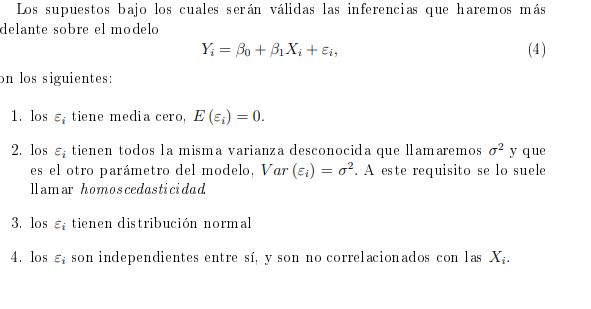

In [7]:
Image(filename = 'C:/Users/URIEL/Documents/ALGORITMOS DE MACHINE LEARNING/imagenes/regresion_2.png')

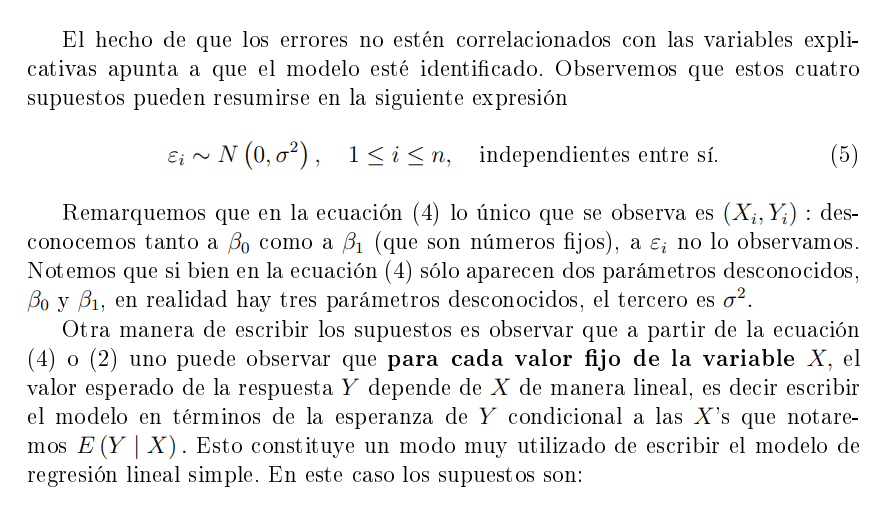

In [8]:
Image(filename = 'C:/Users/URIEL/Documents/ALGORITMOS DE MACHINE LEARNING/imagenes/regresion_3.png')

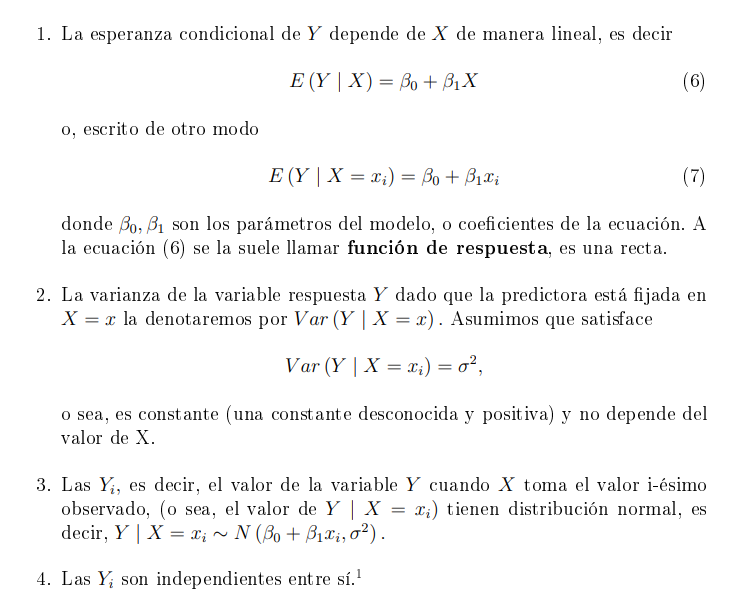

In [9]:
Image(filename = 'C:/Users/URIEL/Documents/ALGORITMOS DE MACHINE LEARNING/imagenes/regresion_4.png')

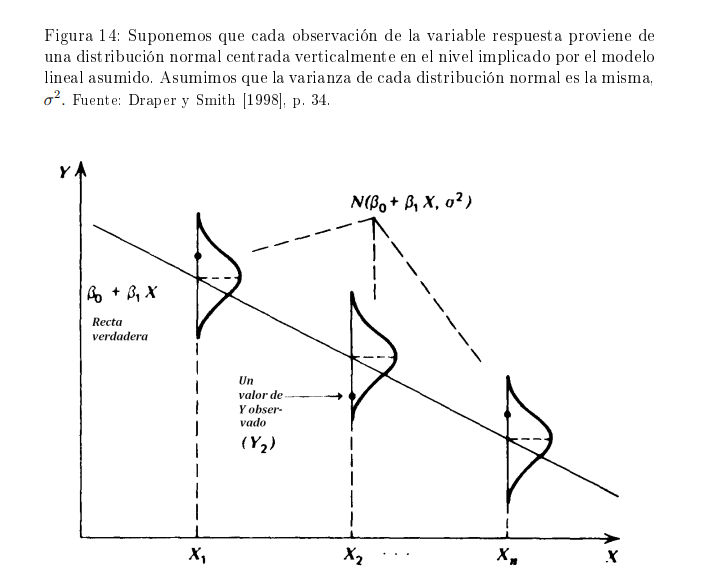

In [10]:
Image(filename = 'C:/Users/URIEL/Documents/ALGORITMOS DE MACHINE LEARNING/imagenes/regresion_5.png')

# Estimacion de B0 y B1

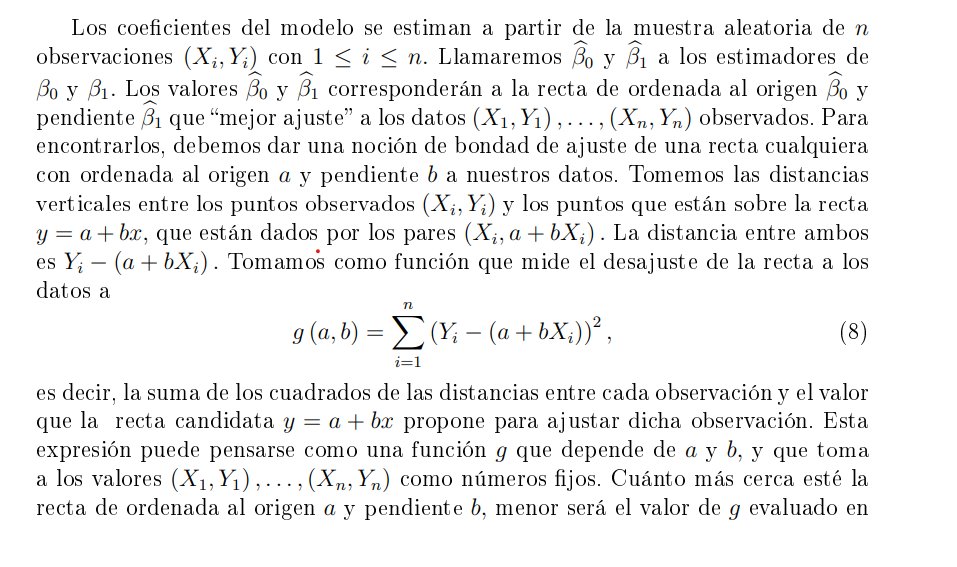

In [11]:
Image(filename = 'C:/Users/URIEL/Documents/ALGORITMOS DE MACHINE LEARNING/imagenes/regresion_6.png')

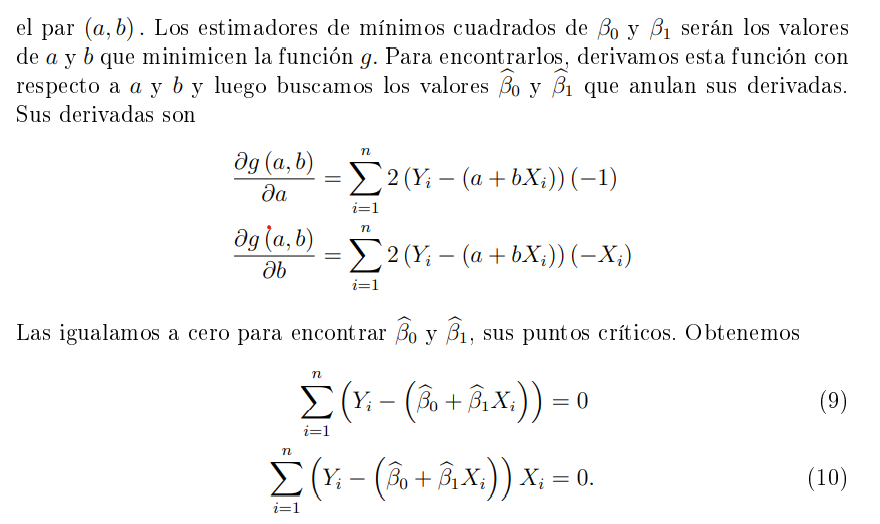

In [12]:
Image(filename = 'C:/Users/URIEL/Documents/ALGORITMOS DE MACHINE LEARNING/imagenes/regresion_7.png')

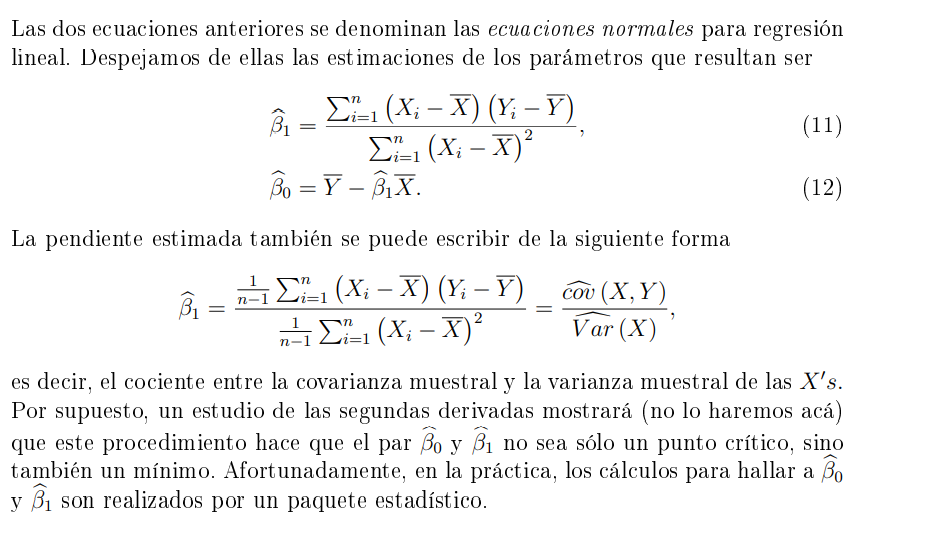

In [13]:
Image(filename = 'C:/Users/URIEL/Documents/ALGORITMOS DE MACHINE LEARNING/imagenes/regresion_8.png')

In [9]:
x_mean = np.mean(df["YearsExperience"])
y_mean = np.mean(df["Salary"])
x_mean , y_mean

(5.3133333333333335, 76003.0)

##  Coeficientes optimos de regresión por metodo de minimos cuadrados

### Beta 1 estimado

In [10]:
df["beta_numerador"] = (df["YearsExperience"] - x_mean) * (df["Salary"] - y_mean)
df["beta_denominador"] = (df["YearsExperience"] - x_mean)**2
beta_1 = sum(df["beta_numerador"])/sum(df["beta_denominador"])

### Beta 0 estimado

In [11]:
beta_0 = y_mean - beta_1 * x_mean

In [12]:
(beta_1, beta_0)

(9449.962321455077, 25792.20019866869)

# Recta ajustada, valores predichos y residuos

Una vez ya teniendo los estimadores de beta_0 y beta_1, se propone la recta ajustada:

$$ \widehat{Y} = 25792.20019866869 + 9449.962321455077 * X$$

de tal manera que dicha recta ajustada se aproxima a la recta de regresión lineal propuesta para representar al conjunto de datos que es: 



$$Y = \beta_{0} + \beta_{1}X + \epsilon$$

osea $$\widehat{Y} \rightarrow Y$$

In [13]:
X = df['YearsExperience']
Y = df['Salary']
recta_ajustada = beta_0 + beta_1 * X

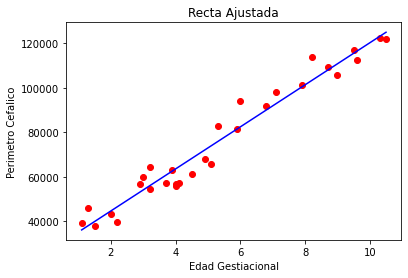

In [14]:
#graficamente 
plt.scatter(X, Y, color = "red")
plt.plot(X,recta_ajustada,color = "blue")
plt.xlabel('Edad Gestiacional')
plt.ylabel('Perimetro Cefalico')
plt.title('Recta Ajustada')
plt.show()

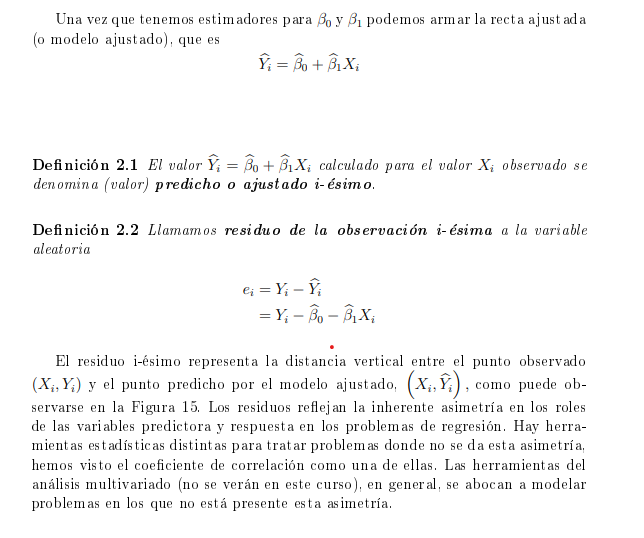

In [20]:
Image(filename = 'C:/Users/URIEL/Documents/ALGORITMOS DE MACHINE LEARNING/imagenes/regresion_9.png')

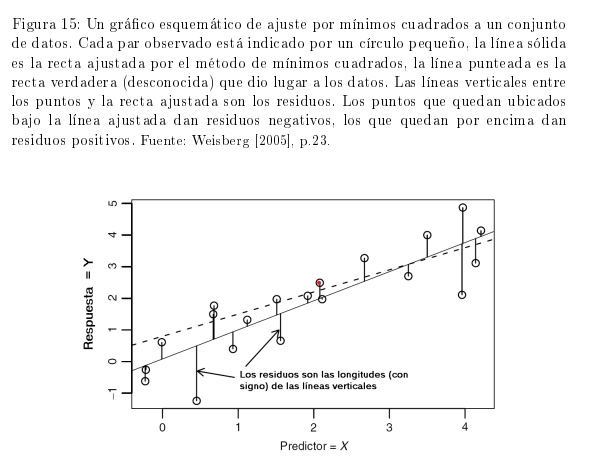

In [21]:
Image(filename = 'C:/Users/URIEL/Documents/ALGORITMOS DE MACHINE LEARNING/imagenes/regresion_10.png')

In [15]:
df['valor_predicho'] = beta_0 + beta_1 * X

In [16]:
df['residuo'] = Y - df['valor_predicho']

## Significado de los coeficientes estimados

$$ \widehat{Y} = -3.1607142857142776 + 1.0178571428571426 * X$$

El valor de la ordenada al origen, es decir -3.91 es el valor del perimetro cefalico esperado para una edad gestacional de 0 semanas, lo que en muchos casos no tiene sentido. La pendiente de la recta es 1.01, lo que implica que para cada incremento de una semana en la edad gestacional, el perimetro cefalico del bebe aumenta en 1.01 centrimetros en promedio.

In [17]:
df = df[['YearsExperience','Salary','valor_predicho','residuo']]

In [18]:
df.head()

YearsExperience   Salary  valor_predicho      residuo
0              1.1  39343.0    36187.158752  3155.841248
1              1.3  46205.0    38077.151217  8127.848783
2              1.5  37731.0    39967.143681 -2236.143681
3              2.0  43525.0    44692.124842 -1167.124842
4              2.2  39891.0    46582.117306 -6691.117306

## ¿Que error tiene esta predicción?

Para contestar esta pregunta tenemos que estimar la varianza condicional de Y

# Estimacion de sigma^2

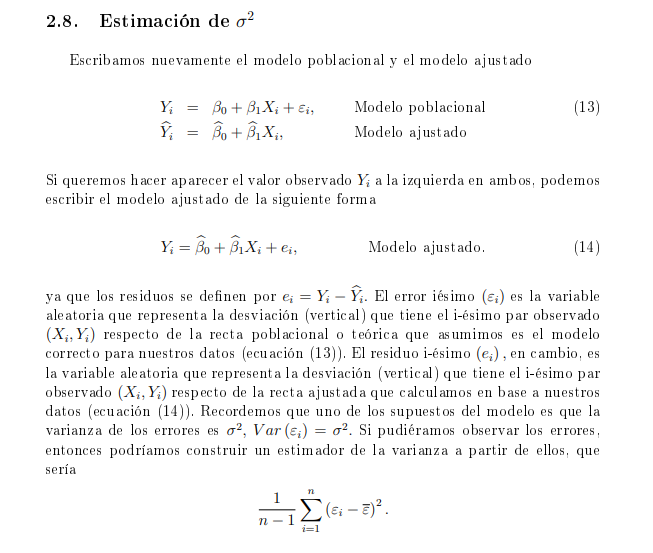

In [26]:
Image(filename = 'C:/Users/URIEL/Documents/ALGORITMOS DE MACHINE LEARNING/imagenes/regresion_11.png')

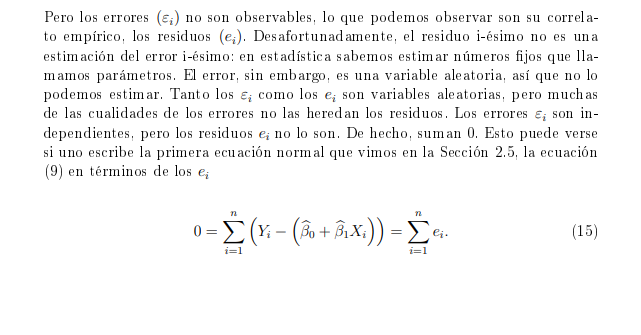

In [27]:
Image(filename = 'C:/Users/URIEL/Documents/ALGORITMOS DE MACHINE LEARNING/imagenes/regresion_12.png')

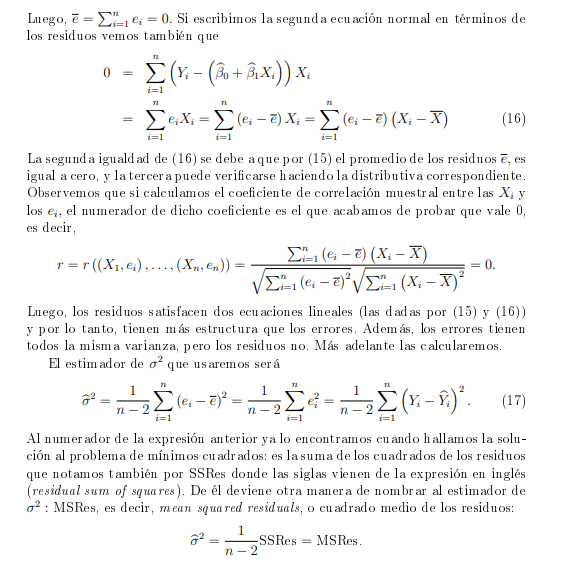

In [28]:
Image(filename = 'C:/Users/URIEL/Documents/ALGORITMOS DE MACHINE LEARNING/imagenes/regresion_13.png')

In [19]:
#estimador de la varianza 
n = len(df)
mean_squared_residuals = sum(df['residuo'] ** 2) * (1/(n-2))

In [20]:
mean_squared_residuals

33504591.131015323

In [21]:
#La varianza de los datos es:
df['Salary'].var()

751550960.4137931

In [32]:
# se puede observar que msr < que la varianza de los datos

# Inferencia sobre $\beta_1$

 Para el estimador  $\widehat{\beta_1}$, si los datos siguen el modelo poblacional $Y = \beta_{0} + \beta_{1}X + \epsilon$, junto con los supuestos (homocedasticidad, independencia y normalidad en los errores)  
 
 $\rightarrow$ 
 
 podemos estimar la varianza y la esperanza de  $\widehat{\beta_1}$

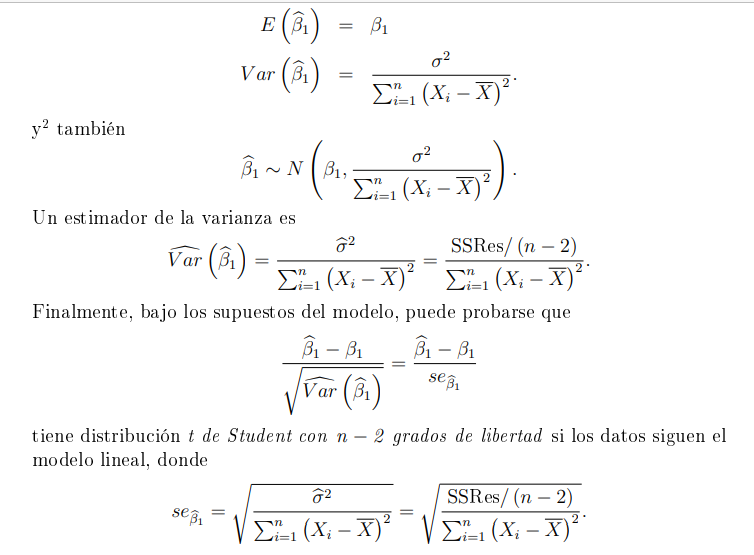

In [33]:
Image(filename = 'C:/Users/URIEL/Documents/ALGORITMOS DE MACHINE LEARNING/imagenes/regresion_14.png')

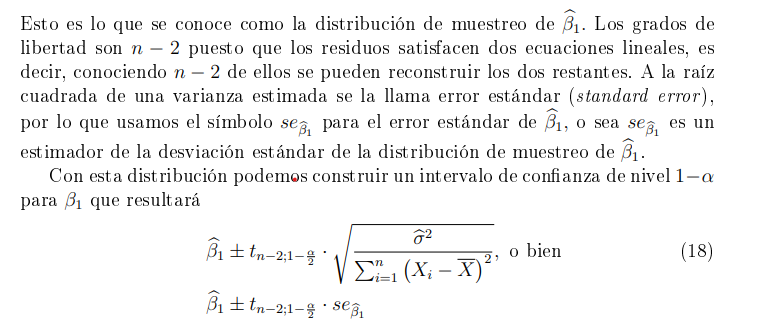

In [34]:
Image(filename = 'C:/Users/URIEL/Documents/ALGORITMOS DE MACHINE LEARNING/imagenes/regresion_15.png')

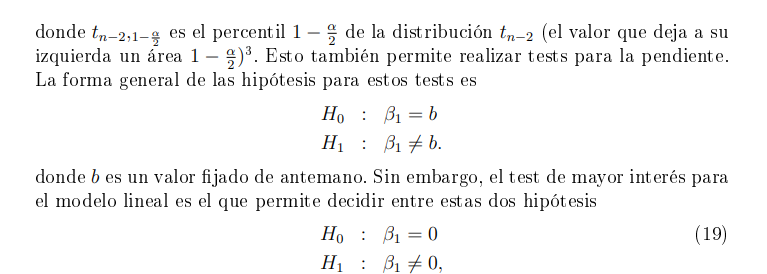

In [35]:
Image(filename = 'C:/Users/URIEL/Documents/ALGORITMOS DE MACHINE LEARNING/imagenes/regresion_16.png')

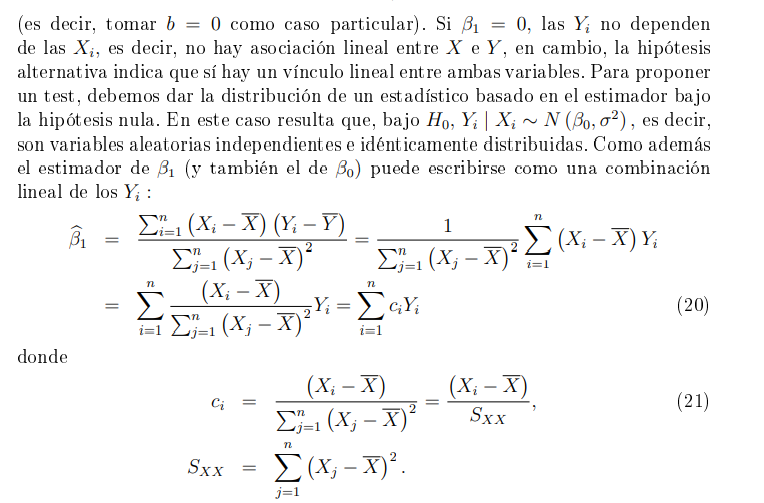

In [36]:
Image(filename = 'C:/Users/URIEL/Documents/ALGORITMOS DE MACHINE LEARNING/imagenes/regresion_17.png')

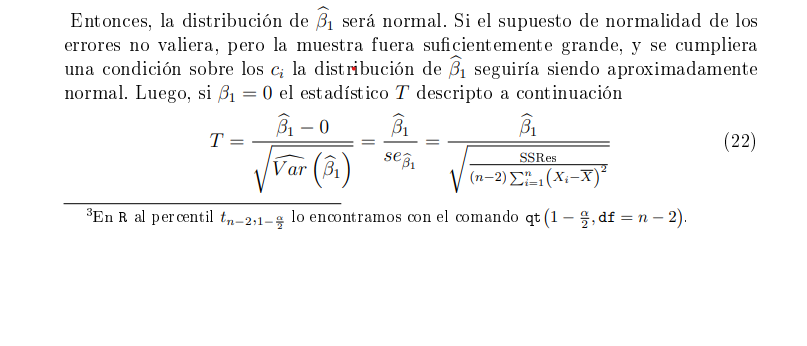

In [37]:
Image(filename = 'C:/Users/URIEL/Documents/ALGORITMOS DE MACHINE LEARNING/imagenes/regresion_18.png')

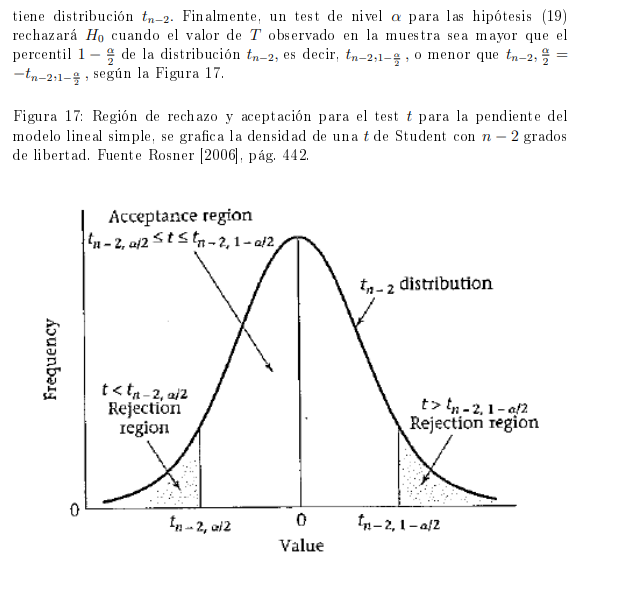

In [38]:
Image(filename = 'C:/Users/URIEL/Documents/ALGORITMOS DE MACHINE LEARNING/imagenes/regresion_19.png')

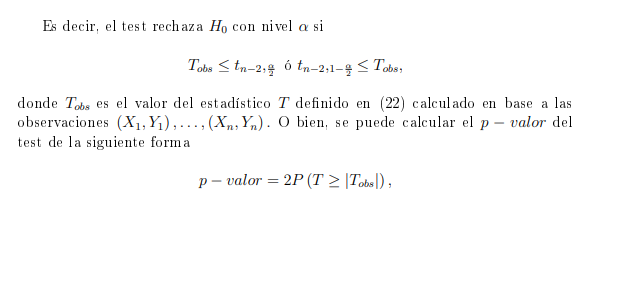

In [39]:
Image(filename = 'C:/Users/URIEL/Documents/ALGORITMOS DE MACHINE LEARNING/imagenes/regresion_20.png')

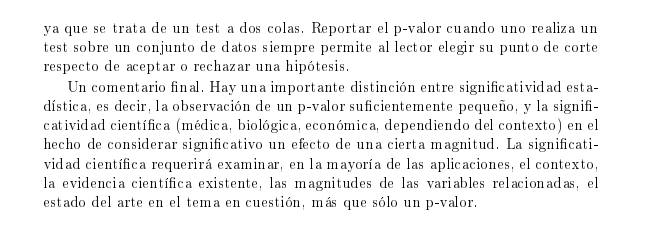

In [40]:
Image(filename = 'C:/Users/URIEL/Documents/ALGORITMOS DE MACHINE LEARNING/imagenes/regresion_21.png')

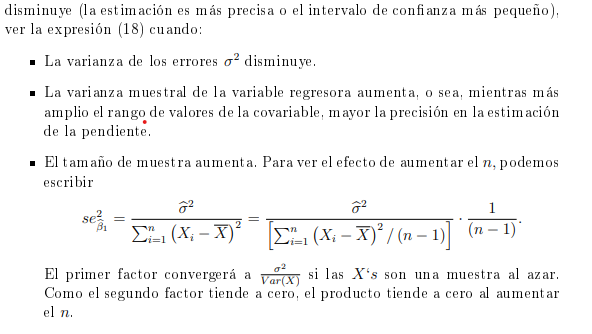

In [41]:
Image(filename = 'C:/Users/URIEL/Documents/ALGORITMOS DE MACHINE LEARNING/imagenes/regresion_22.png')

In [57]:
def infe_b1(df,X,Y, alpha = 0.05):
    from scipy.stats import t
    
    n = len(df)
    
    #calcular b1 estimado
    Sxx = sum((df[X] - np.mean(df[X])) ** 2)
    ci = (df[X] - np.mean(df[X])) / Sxx
    beta1_est = sum(ci * df[Y])
    
    # raiz cuadrada del estimador de la varianza de beta 1 estimado
    se_b1 = np.sqrt( (sum(df['residuo'] ** 2) * (1/(n-2))) / (sum((df[X] - np.mean(df[X])) ** 2)) )
    
    # t_(n-2),(1-alpha/2) =  percentil 1 - alpha/2  de la distribucion t_(n-2)
    t_student = t.ppf(1 - (alpha/2), n-2)
    
    intervalo_confianza =  (t_student * se_b1) - beta1_est , beta1_est + (t_student * se_b1)
    
    print('Intervalo de confianza para B1: {} '.format(intervalo_confianza))
    print('----------------------------------------------------------------')
    print('----------------------------------------------------------------')
    print('Prueba a nivel del 0.05 para la hipotesis:   H0 : B1=0 vs H1 : B1!=0 ')
    
    T_obs = beta1_est / se_b1
    
    if T_obs > t_student:
        print('Rechazamos H0, aceptando H1, concluyendo que el parametro poblacional que mide la pendiente del modelo lineal es distinto de cero')
    else:
        print('Aceptamos H0, concluyendo que el parametro poblacional que midel la pendiente es 0')
    


In [58]:
infe_b1(df,'YearsExperience','Salary')

Intervalo de confianza para B1: (-8674.11874659666, 10225.805896313495) 
----------------------------------------------------------------
----------------------------------------------------------------
Prueba a nivel del 0.05 para la hipotesis:   H0 : B1=0 vs H1 : B1!=0 
Rechazamos H0, aceptando H1, concluyendo que el parametro poblacional que mide la pendiente del modelo lineal es distinto de cero


El intervalo esta en los Reales, el verdadedor valor de la pendiente B1 puede ser positivo o negativo, la muestra es muy pequeña, por ende el intervalo no es muy preciso del todo. 

# Inferencia sobre B0

De igual manera que con B1, bajo los supuestos del modelo lineal: 

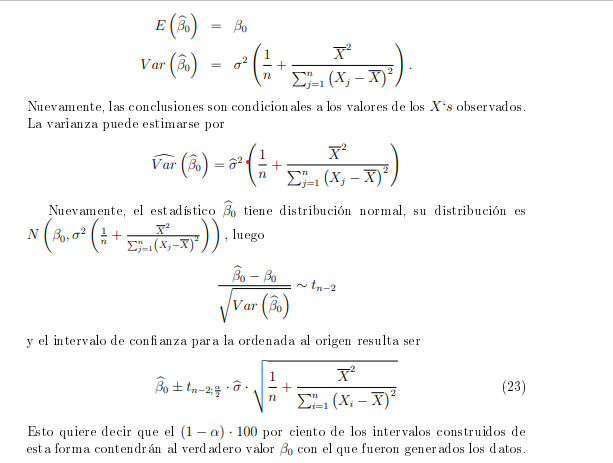

In [44]:
Image(filename = 'C:/Users/URIEL/Documents/ALGORITMOS DE MACHINE LEARNING/imagenes/regresion_23.png')

In [79]:
def infe_b0(df,X,Y, alpha = 0.05):
    from scipy.stats import t
    
    n = len(df)
    #calcular b1 estimado
    Sxx = sum((df[X] - np.mean(df[X])) ** 2)
    ci = (df[X] - np.mean(df[X])) / Sxx
    beta1_est = sum(ci * df[Y])
    
    #calcular b0 estimado
    beta0_est = np.mean(df[Y]) - (beta1_est*np.mean(df[X]))

    
    # raiz cuadrada del estimador de la varianza de b0 estimado
    se_b0 = np.sqrt( (1/n) + (((np.mean(df[X]))**2)/(sum((df[X] - np.mean(df[X]))**2))) )
    
    # t_(n-2),(alpha/2) =  percentil alpha/2  de la distribucion t_(n-2)
    t_student = t.ppf((alpha/2), n-2)
    
    #varianza estimada 
    var_est = sum((df['residuo'] ** 2) * (1/(n-2)))
    
    
    
    intervalo_confianza =  (t_student * var_est * se_b0) - beta0_est , beta0_est + (t_student * var_est * se_b0)
    
    print('Intervalo de confianza para B0: {} '.format(intervalo_confianza))
    print('----------------------------------------------------------------')
    print('----------------------------------------------------------------')
    print('Prueba a nivel del 0.05 para la hipotesis:   H0 : B0=0 vs H1 : B0!=0 ')
    
    T_obs = beta0_est / se_b0
    
    if T_obs > t_student:
        print('Rechazamos H0, aceptando H1, concluyendo que el parametro poblacional que mide la pendiente del modelo lineal es distinto de cero')
    else:
        print('Aceptamos H0, concluyendo que el parametro poblacional que midel la pendiente es 0')
    


In [80]:
infe_b0(df,'YearsExperience', 'Salary')

Intervalo de confianza para B0: (-26976990.9882443, -26925406.58784696) 
----------------------------------------------------------------
----------------------------------------------------------------
Prueba a nivel del 0.05 para la hipotesis:   H0 : B0=0 vs H1 : B0!=0 
Rechazamos H0, aceptando H1, concluyendo que el parametro poblacional que mide la pendiente del modelo lineal es distinto de cero


# Intervalo de confianza para la respuesta media de Y cuando $ X = x_{h}$

Queremos estimar el valor que se espera pueda tomar Y dado un valor $ X = x_{h}$, osea:

$$ E(Y_{h} | X_{h}=x_{h}) = \beta_{0} = \beta_{1} * x_{h}$$

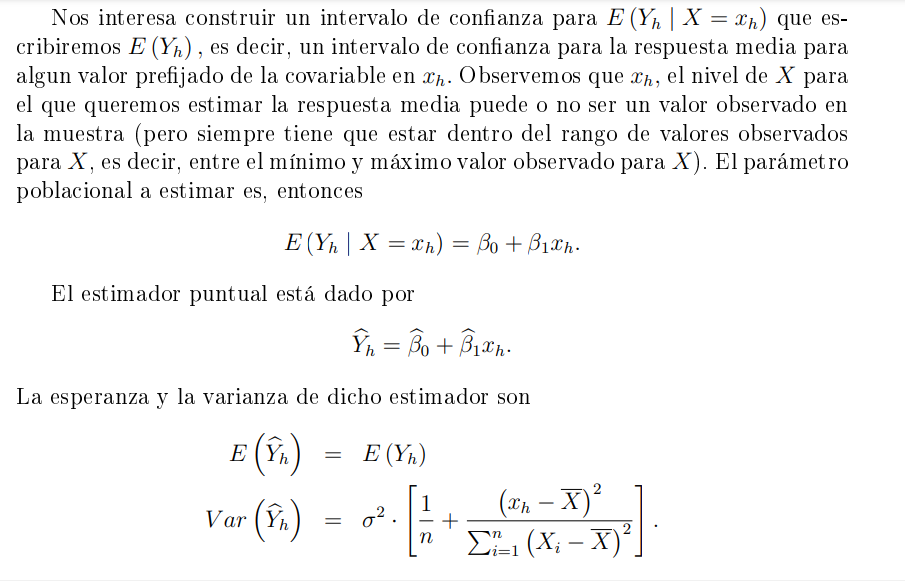

In [82]:
Image(filename = 'C:/Users/XMX5634/Documents/theory-of-ML-algorithms/imagenes/regresion_24.png')

In [101]:
def IC_Yh_real(df,X,Y,x,alpha = 0.05):
    from scipy.stats import t
    n = len(df)
    
    # Yh estimado
    Sxx = sum((df[X] - np.mean(df[X])) ** 2)
    ci = (df[X] - np.mean(df[X])) / Sxx
    Yh_estimado =  sum(( (1/n) + (ci*(x - np.mean(df[X]))) ) * df[Y])
   

    # t_(n-2),(alpha/2) =  percentil alpha/2  de la distribucion t_(n-2)
    t_student = t.ppf(1 - (alpha/2), n-2)
    
    #varianza estimada 
    var_est = sum((df['residuo'] ** 2) * (1/(n-2)))
    
    # raiz cuadrada del estimador de la varianza de b0 estimado
    se_Yh = np.sqrt( (1/n) + (( ((x - np.mean(df[X])) ** 2) / (sum((df[X] - np.mean(df[X])) ** 2)) )) )
    
    Yh_sup =  Yh_estimado + (t_student * var_est * se_Yh)
    Yh_inf = (t_student * var_est * se_Yh) - Yh_estimado
    
    return Yh_inf, Yh_sup
    

In [102]:
df['IC_Yh'] = df['YearsExperience'].apply(lambda x : IC_Yh_real(df,'YearsExperience','Salary',x))

In [103]:
df

YearsExperience    Salary  valor_predicho       residuo  \
0               1.1   39343.0    36187.158752   3155.841248   
1               1.3   46205.0    38077.151217   8127.848783   
2               1.5   37731.0    39967.143681  -2236.143681   
3               2.0   43525.0    44692.124842  -1167.124842   
4               2.2   39891.0    46582.117306  -6691.117306   
5               2.9   56642.0    53197.090931   3444.909069   
6               3.0   60150.0    54142.087163   6007.912837   
7               3.2   54445.0    56032.079627  -1587.079627   
8               3.2   64445.0    56032.079627   8412.920373   
9               3.7   57189.0    60757.060788  -3568.060788   
10              3.9   63218.0    62647.053252    570.946748   
11              4.0   55794.0    63592.049484  -7798.049484   
12              4.0   56957.0    63592.049484  -6635.049484   
13              4.1   57081.0    64537.045717  -7456.045717   
14              4.5   61111.0    68317.030645  -7206.030645   
15              4.9   67938.0    72097.015574  -4159.015574   
16              5.1   66029.0    73987.008038  -7958.008038   
17              5.3   83088.0    75877.000502   7210.999498   
18              5.9   81363.0    81546.977895   -183.977895   
19              6.0   93940.0    82491.974127  11448.025873   
20              6.8   91738.0    90051.943985   1686.056015   
21              7.1   98273.0    92886.932681   5386.067319   
22              7.9  101302.0   100446.902538    855.097462   
23              8.2  113812.0   103281.891235  10530.108765   
24              8.7  109431.0   108006.872395   1424.127605   
25              9.0  105582.0   110841.861092  -5259.861092   
26              9.5  116969.0   115566.842252   1402.157748   
27              9.6  112635.0   116511.838485  -3876.838485   
28             10.3  122391.0   123126.812110   -735.812110   
29             10.5  121872.0   125016.804574  -3144.804574   

                                       IC_Yh  
0   (22657972.282405213, 22730346.599909753)  
1   (21912835.528308075, 21988989.830741193)  
2   (21179685.643040393, 21259619.930402096)  
3    (19408072.23739225, 19497456.487075407)  
4    (18728082.88536657, 18821247.119978312)  
5    (16513836.575478643, 16620230.75734042)  
6   (16222653.865880832, 16330938.040206902)  
7   (15662717.938560257, 15774782.097814908)  
8   (15662717.938560257, 15774782.097814908)  
9     (14413367.294721296, 14534881.4162974)  
10   (13983427.10293391, 14108721.209438596)  
11   (13785349.66812685, 13912533.767095828)  
12   (13785349.66812685, 13912533.767095828)  
13   (13599193.21892455, 13728267.310357818)  
14   (12983440.79873579, 13120074.860026222)  
15  (12594901.402937183, 12739095.434084779)  
16  (12492841.767974408, 12640815.784050586)  
17   (12454523.00261505, 12606277.003619812)  
18  (12722692.699038938, 12885786.654829446)  
19   (12821637.295542682, 12986621.24379748)  
20  (14107876.075740034, 14287979.963709159)  
21  (14786147.715982322, 14971921.581344321)  
22   (16985954.952534407, 17186848.75761074)  
23   (17926144.293141384, 18132708.07561058)  
24  (19597804.956940416, 19813818.701731075)  
25   (20652455.40227046, 20874139.124453984)  
26  (22478842.788817916, 22709976.473322902)  
27  (22852945.379605427, 23085969.056574702)  
28   (25538324.988661155, 25784578.61288047)  
29   (26323883.06883452, 26573916.677982412)